In [2]:
import pandas as pd

In [3]:
import os
from scipy import io
import numpy as np
path = r'C:\Users\bumsung\Downloads\DEAP\DEAP\data_preprocessed_matlab/' # 경로는 저장 파일 경로
file_list = os.listdir(path)

for i in file_list:    # 확인
    print(i, end=' ')

s01.mat s02.mat s03.mat s04.mat s05.mat s06.mat s07.mat s08.mat s09.mat s10.mat s11.mat s12.mat s13.mat s14.mat s15.mat s16.mat s17.mat s18.mat s19.mat s20.mat s21.mat s22.mat s23.mat s24.mat s25.mat s26.mat s27.mat s28.mat s29.mat s30.mat s31.mat s32.mat 

In [4]:
mat_file = io.loadmat(path+'s01.mat')

In [5]:
mat_file['data'].shape

(40, 40, 8064)

In [6]:
mat_file['labels'].shape

(40, 4)

In [7]:
mat_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'data'])

In [8]:
k=0

for i in file_list: 
    mat_file = io.loadmat(path+i)
    data = mat_file['data']
    labels = np.array(mat_file['labels'])
    val = labels.T[0].round().astype(np.int8)
    aro = labels.T[1].round().astype(np.int8)
    
    k+=1;
    print(k, end=' ')
    
    if(i=="s01.mat"): 
        Data = data
        VAL = val
        ARO = aro
        continue
        
    Data = np.concatenate((Data ,data),axis=0)   # 밑으로 쌓아서 하나로 만듬
    VAL = np.concatenate((VAL ,val),axis=0)
    ARO = np.concatenate((ARO ,aro),axis=0)

print('finish')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 finish


                 0
count  1280.000000
mean      5.235938
std       2.135508
min       1.000000
25%       4.000000
50%       5.000000
75%       7.000000
max       9.000000


C:\Users\bumsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

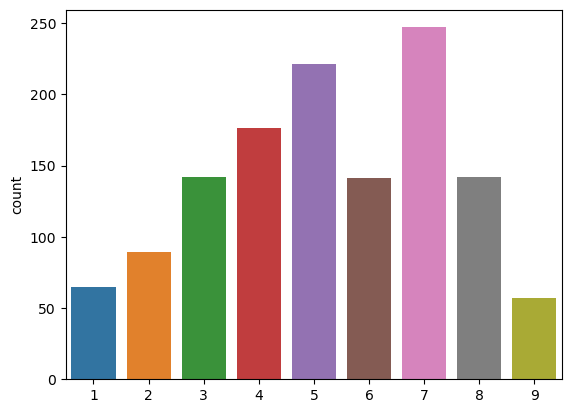

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print(pd.DataFrame(VAL).describe())
sns.countplot(VAL)

In [28]:
data.shape
print(VAL)

[8 8 9 ... 3 4 7]


In [36]:
val.shape
from tensorflow.keras.utils import to_categorical

VAL_one = to_categorical(VAL-1, num_classes=9)
print(one.shape)
print(one[0])

(1280, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [30]:
eeg_data = []
peripheral_data = []

for i in range(len(Data)):
    for j in range (40): 
        if(j < 32):
            eeg_data.append(Data[i][j])
        else:
            peripheral_data.append(Data[i][j])


In [31]:
eeg_data = np.reshape(eeg_data, (len(Data),32, 8064))
print(eeg_data.shape)

(1280, 32, 8064)


In [32]:
VAL.shape

(1280,)

data	40 x 40 x 8064	video/trial x channel x data

labels	40 x 4	video/trial x label (valence, arousal, dominance, liking)


In [33]:
val.shape

(40,)

### data split

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(eeg_data, VAL_one, test_size=0.5)

In [35]:
print(x_train.shape)
print(x_test.shape)

(896, 32, 8064)
(896,)


In [27]:
pip install tensorflow


     -------------------------------------- 266.3/266.3 MB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 10.7 MB/s eta 0:00:00
     ------------------------------------- 895.9/895.9 kB 11.2 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 11.1 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 11.6 MB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 11.4 MB/s eta 0:00:00
     ------------------------------------- 177.0/177.0 kB 11.1 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.3 kB

In [15]:
pip install --upgrade tf_slim

     ------------------------------------- 352.1/352.1 kB 11.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf

In [2]:
from keras.models import Sequential
import keras.layers as nn
from keras.layers import Input, Dense
from keras.models import Model
import keras

In [4]:
channel_size = 32
time_size = 8064
depth_size = 1
cls_num = 9;
lrelu = tf.nn.leaky_relu

data_source = 0
data_target = 0
 
w_adv = 0 
w_t = 0 
w_s = 0
w_c = 0

레퍼런스

- https://codeonweb.com/entry/6767c929-83dc-458e-a884-8631d8b8a46e
- https://stackoverflow.com/questions/51680818/keras-custom-loss-as-a-function-of-multiple-outputs

In [5]:
#main model
inputs = Input(shape=(channel_size,time_size,1))
inputs_s = Input(shape=(channel_size,time_size,1))

conv1 = nn.Conv2D(filters=30, kernel_size=(1,25))
conv2 = nn.Conv2D(filters=30, kernel_size=(channel_size,1))
flatten = nn.Flatten()
full = nn.Dense(64, activation=lrelu)
full2 = nn.Dense(16, activation=lrelu)
cls = nn.Dense(cls_num, activation=None)
soft = nn.Softmax()

#discriminator
discriminator = Sequential([
    nn.Dense(64, activation=lrelu),
    nn.Dense(32, activation=lrelu),
    nn.Dense(16, activation=lrelu),
    nn.Dense(1, activation='sigmoid')
])

######

x = conv1(inputs)
x_s = conv1(inputs_s)

x = conv2(x)
x_s = conv2(x_s)

fc = flatten(x)
fc_s = flatten(x_s)

feat = full(fc)
feat_s = full(fc_s)

### discriminator
dx = discriminator(feat)
dx_s = discriminator(feat_s)
###


net2 = full2(feat)
net2_s = full2(feat_s)

net = cls(net2)
net_s = cls(net2_s)

pred = soft(net)
pred_s = soft(net_s)

### label input
label = Input((9,))
label_s = Input((9,)) 

model = Model(inputs=[inputs, inputs_s, label,label_s], outputs=[pred, dx])

#x =  nn.Conv2D(filters=30, kernel_size=(channel_size,1))(x)
#x =  nn.AveragePooling2D(pool_size=(1,75), strides=(1,15))(x)
#fc = nn.Flatten()(x)
#feat = nn.Dense(64, activation=lrelu)(fc)
#net2 = nn.Dense(16, activation=lrelu)(feat)
#net = nn.Dense(cls_num, activation=None)(net2)
#pred = nn.Softmax()(net)

#model = Model(inputs=inputs, outputs=pred)


In [6]:
#loss _ disc
d_loss = tf.reduce_mean(tf.square(dx - 1)+tf.square(dx_s))/2

#loss
g_loss_adv = tf.reduce_mean(tf.square(dx-1))/2
g_loss_ce_t = tf.losses.categorical_crossentropy(pred, label)
g_loss_ce_s = tf.losses.categorical_crossentropy(pred_s, label_s)

# g_loss_center 나중에...
g_loss_center = 0


g_loss = w_adv*d_loss + w_t * g_loss_ce_t + w_s*g_loss_ce_s + w_c*g_loss_center


In [7]:
model.compile(optimizer='adam',
             loss={'pred' : g_loss, 'dx': d_loss}) #역전파 반영 멈추기?

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 8064, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 32, 8040, 30  780         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1, 8040, 30)  28830       ['conv2d[0][0]']                 
                                                                                              

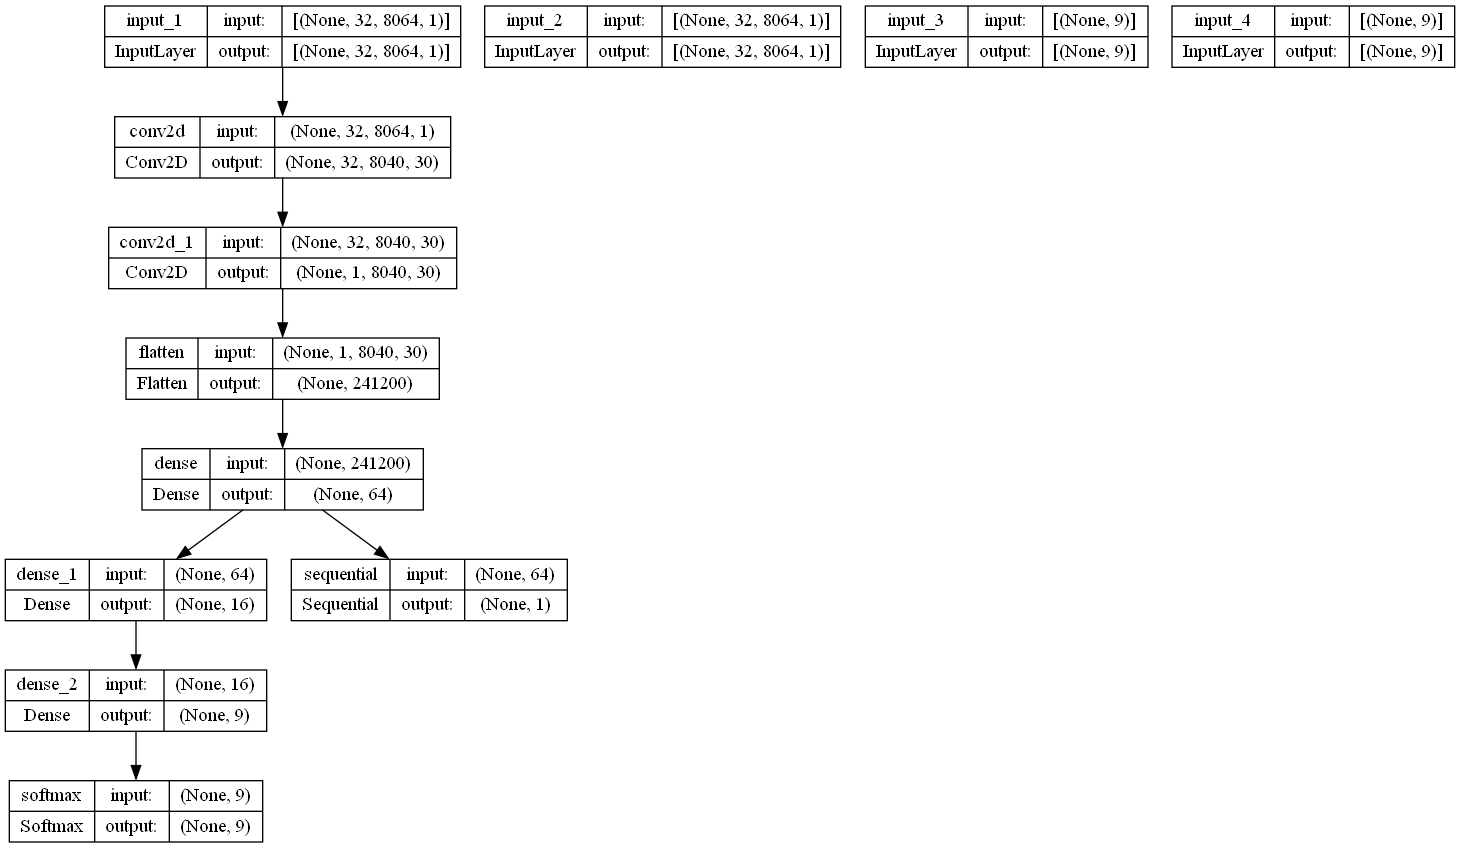

In [9]:
tf.keras.utils.plot_model(model, to_file="img.png", show_shapes=True)

In [20]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [115]:
print(x_test.shape, x_train.shape, y_test.shape, y_train.shape)

(640, 32, 8064) (640, 32, 8064) (640, 9) (640, 9)


In [120]:
dummy = np.zeros((640,))
dummy2 = np.zeros((640,))

model.fit({'inputs': x_test, 'inputs_s':x_train,
          'label' : y_test, 'label_s': y_train},
          
          epochs=10, batch_size=32)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\bumsung\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\bumsung\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\bumsung\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\bumsung\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\bumsung\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\bumsung\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 197, in assert_input_compatibility
        raise ValueError(

    ValueError: Missing data for input "input_31". You passed a data dictionary with keys ['inputs', 'inputs_s', 'label', 'label_s']. Expected the following keys: ['input_31', 'input_32', 'input_33', 'input_34']
